In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/rizuchaa/Dataset/main/suicide%20homicide%20gdp.csv')
df.head()

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,NaN,NaN,1.748887e+09,NaN,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,1.831109e+09,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,1.595555e+09,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,NaN,NaN,1.733333e+09,NaN,South Asia,Low income
4,Afghanistan,AFG,AF,1974,NaN,NaN,2.155555e+09,NaN,South Asia,Low income


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13566 entries, 0 to 13565
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   country                                          13566 non-null  object 
 1   iso3c                                            13464 non-null  object 
 2   iso2c                                            13413 non-null  object 
 3   year                                             13566 non-null  int64  
 4   Intentional homicides (per 100,000 people)       3840 non-null   float64
 5   Suicide mortality rate (per 100,000 population)  4620 non-null   float64
 6   GDP (current US$)                                11396 non-null  float64
 7   GDP per capita, PPP (current international $)    7238 non-null   float64
 8   adminregion                                      6987 non-null   object 
 9   incomeLevel                 

In [11]:
df.isnull().sum()

country                                               0
iso3c                                               102
iso2c                                               153
year                                                  0
Intentional homicides (per 100,000 people)         9726
Suicide mortality rate (per 100,000 population)    8946
GDP (current US$)                                  2170
GDP per capita, PPP (current international $)      6328
adminregion                                        6579
incomeLevel                                         102
dtype: int64

In [12]:
missing_data = df.isnull()
missing_data.head(5)

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,False,False,False,False,True,True,False,True,False,False
1,False,False,False,False,True,True,False,True,False,False
2,False,False,False,False,True,True,False,True,False,False
3,False,False,False,False,True,True,False,True,False,False
4,False,False,False,False,True,True,False,True,False,False


In [13]:
df_nonull = df.dropna()

In [14]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

country
False    13566
Name: country, dtype: int64

iso3c
False    13464
True       102
Name: iso3c, dtype: int64

iso2c
False    13413
True       153
Name: iso2c, dtype: int64

year
False    13566
Name: year, dtype: int64

Intentional homicides (per 100,000 people)
True     9726
False    3840
Name: Intentional homicides (per 100,000 people), dtype: int64

Suicide mortality rate (per 100,000 population)
True     8946
False    4620
Name: Suicide mortality rate (per 100,000 population), dtype: int64

GDP (current US$)
False    11396
True      2170
Name: GDP (current US$), dtype: int64

GDP per capita, PPP (current international $)
False    7238
True     6328
Name: GDP per capita, PPP (current international $), dtype: int64

adminregion
False    6987
True     6579
Name: adminregion, dtype: int64

incomeLevel
False    13464
True       102
Name: incomeLevel, dtype: int64



In [15]:
variables = ['Intentional homicides (per 100,000 people)','Suicide mortality rate (per 100,000 population)',
 'GDP (current US$)','GDP per capita, PPP (current international $)']

In [16]:
def plot_crime_gdp_rates(df, y_variables, title=''):
    plt.figure(figsize=(20,10))
    for i, y in enumerate(y_variables):
        axi = plt.subplot(2, 2, i+1)
        sns.lineplot(ax=axi, data=df, x='year', y=y)
        axi.set_ylabel(y)
        axi.set_title(title)

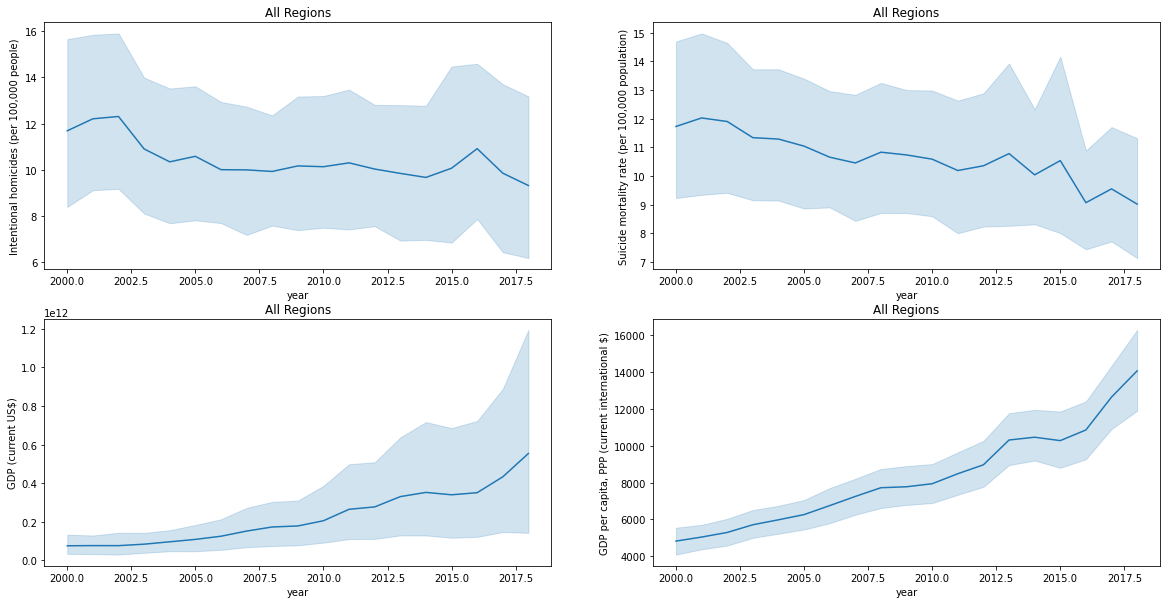

In [17]:
dfi = df_nonull
title = 'All Regions'
plot_crime_gdp_rates(dfi, variables, title)

In [18]:
df.corr()

,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)"
year,1.000000,-0.025290,-0.078297,0.151436,0.258750
"Intentional homicides (per 100,000 people)",-0.025290,1.000000,-0.014424,-0.054805,-0.241067
"Suicide mortality rate (per 100,000 population)",-0.078297,-0.014424,1.000000,0.040504,0.064282
GDP (current US$),0.151436,-0.054805,0.040504,1.000000,0.130049
"GDP per capita, PPP (current international $)",0.258750,-0.241067,0.064282,0.130049,1.000000


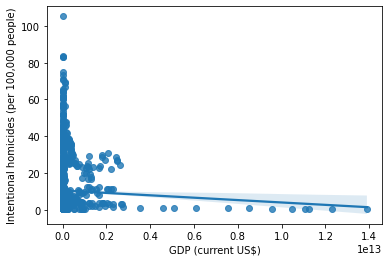

In [19]:
sns.regplot(x="GDP (current US$)", y="Intentional homicides (per 100,000 people)", data=df_nonull)

<AxesSubplot:xlabel='GDP (current US$)', ylabel='Suicide mortality rate (per 100,000 population)'>

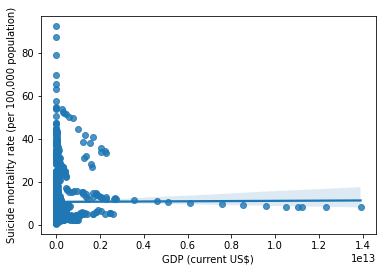

In [20]:
sns.regplot(x="GDP (current US$)", y="Suicide mortality rate (per 100,000 population)", data=df_nonull)


In [35]:
dict_corr = {c: df_nonull.loc[df_nonull['country']==c, :].corr() for c in df_nonull['country'].unique()}

In [40]:
def plot_country_heatmap(country, correlation=dict_corr):
    df_corr = correlation.get(country)
    ax = sns.heatmap(df_corr, fmt='.3f', annot=True, cmap='Reds', annot_kws={'fontsize': 15})
    ax.set_title(country)

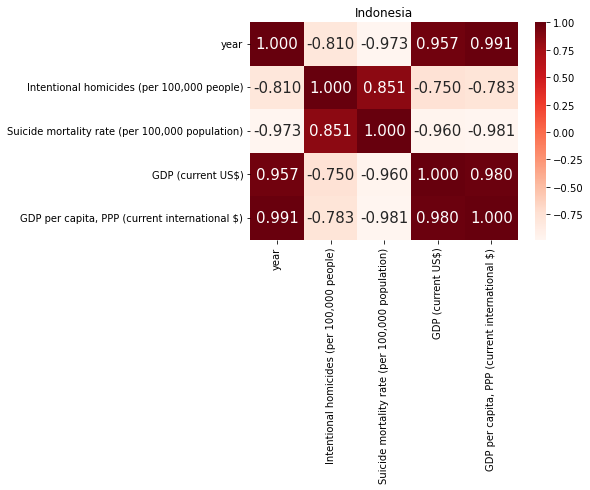

In [41]:
plot_country_heatmap('Indonesia', correlation=dict_corr)